In [97]:
from numpy import log, array, exp, linspace, asarray, argmax, interp, append
from scipy.integrate import odeint
from scipy.stats import linregress 
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline
#%matplotlib notebook

For the first order liquid phase reaction ${A \rightarrow B}$ occurring in an adiabatic CSTR, the following information is available

**Additional information:**

- $C_{A_{0}}$ = $0.1~mol.L^{-1}$
- $Q_{0}$ = $2~L.s^{-1}$
- $V$ = $500~L$
- $k_{0}$ = $20000~s^{-1}$
- $E_{a}$ = $55000~J.mol^{-1}$
- $\Delta H_{RX_{298}}$ = $-30~kJ.mol^{-1}$
- $C_{p_{A}}$ = $157.9~J.mol^{-1}.K^{-1}$
- $C_{p_{B}}$ = $157.9~J.mol^{-1}.K^{-1}$

**<em>Suggestion: If you have time, use interact from ipywidgets in Python and change $Q, Q_{0}, \Delta{H}, E_{a}$ and $T_{0}$ in order to see how each of the parameters will affect the plots! Not compulsory, but really cool.</em>**

In [98]:
#1st order
#liquid phase
#Adiabatic
R      =  8.314 #Kpa.m3/(kmol.K)
CAo    =    0.1 # mol/L
V      =    500 #L
Ko     =  20000 #1/s
Ea     =  55000 #J/mol
delHrx = -30000 #J/mol (exothermic)
CpA    =  157.9 #J/(mol.K)
CpB    =    CpA
Q      =      2 #L/s

**Question a)**

Given an inlet temperature of $340~K$, what is the conversion in the reactor? <em>(hint: Plot the two equations that you have to solve simultaneously as a function of the two variables, T on x-axis and x on y-axis to “see” the solution. Then fine tune by using fsolve!)</em>

Rate equations:
\begin{align}
r_{A} &= -k_{0}e^{-\dfrac{E_{a}}{RT}}C_{A_{0}}(1 - X) \nonumber \\
r_{B} &= -r_{A} \nonumber
\end{align}

Mole balance for CSTR:
\begin{align}
F_{A_{0}} - F_{A} + r_{A}V &= 0 \nonumber \\
QC_{A_{0}}X &= k_{0}e^{(-E_{a}/RT)}C_{A_{0}}(1 - X)V \nonumber \\
X &= \dfrac{k_{0}}{Q}e^{(-E_{a}/RT)}(1 - X)V
\end{align}

Energy balance:
\begin{align}
T_{out} &= T_{in} +  \dfrac{(-\Delta H_{RX})}{C_{p_{A}}}X_{A}
\end{align}

In [99]:
To = 340 #K

def CSTR(var):
    X = var[0]
    T = To - delHrx*X/(CpA)
    return[X - (Ko/Q)*exp(-Ea/(R*T))*(1-X)*V]   

Xcstr = fsolve(CSTR,0.9) #test both 0.1 and 0.9 as different guess
X     = Xcstr[-1]
T     = To - delHrx*X/(CpA)
print('Max conversion for CSTR=', (X*100).round(3),'%')
print('Outlet temperature for CSTR=', (T).round(3),'K')
#NOTE: depending on first guess for fsolve, X=93.2% or X=2.2% - MULTIPLICITY!

Max conversion for CSTR= 93.319 %
Outlet temperature for CSTR= 517.3 K


Rearranging the mole balance:
\begin{align}
X &= \dfrac{k_{0}}{Q}e^{(-E_{a}/RT)}(1 - X)V \nonumber \\
X - \dfrac{k_{i}}{Q}(1 - X)V &= 0 \nonumber \\
let\ \dfrac{k_{i}}{Q} &= k_{1} \nonumber \\
\therefore X - k_{1}V + k_{1}XV &= 0 \nonumber \\
X_{1} &= \dfrac{k_{1}V}{(1 + k_{1}V)}
\end{align}

Rearranging the energy balance:
Energy balance:
\begin{align}
T_{out} &= T_{in} +  \dfrac{(-\Delta H_{RX})}{C_{p_{A}}}X_{A} \nonumber \\
X_{2} &= \dfrac{C_{p_{A}}(T - T_{0})}{-\Delta H_{RX}}
\end{align}

In [100]:
tspan = linspace(To,T,1000)
k1    = (Ko/Q)*exp(-Ea/(R*tspan))
X1    = k1*V/(1+k1*V)
X2    = (CpA*(tspan-To))/-delHrx

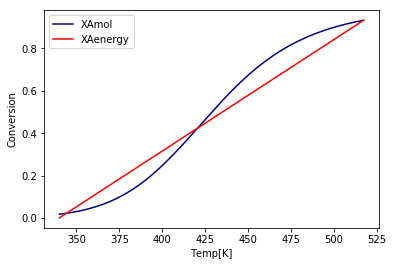

In [101]:
plt.figure(1)
plt.plot(tspan, X1, color='navy', label='XAmol')
plt.plot(tspan, X2, color='red', label='XAenergy')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
plt.show()

So we either have to increase the energy-carrying capacity or increase the inlet temperature


**Question b)**

If the inlet flow rate is changed to $0.8~L/s$, how will the conversion change? Are there any additional advantages to doing this? <em>(Now you can use your plots in a) to see the effect of a change in $Q$ on your mole balance)</em>.

In [102]:
Qb = 0.8 #L/s

def CSTR1(varb):
    Xb = varb[0]
    Tb = To - delHrx*Xb/(CpA)
    return[Xb - (Ko/Qb)*exp(-Ea/(R*Tb))*(1-Xb)*V]   

Xcstrb = fsolve(CSTR1,0.9) #test both 0.1 and 0.9 as different guess
Xb     = Xcstrb[-1]
Tb     = To - delHrx*Xb/(CpA)
print('Max conversion for CSTR=', (Xb*100).round(2),'%')
print('Outlet temperature for CSTR=', (Tb).round(2),'K')

Max conversion for CSTR= 97.72 %
Outlet temperature for CSTR= 525.65 K


So reducing the inlet flowrate has increased both the conversion and the outlet temperature

In [103]:
tspanb = linspace(To,Tb,1000)
kb     = (Ko/Qb)*exp(-Ea/(R*tspanb))
Xb1    = kb*V/(1+kb*V)
Xb2    = (CpA*(tspanb-To))/-delHrx

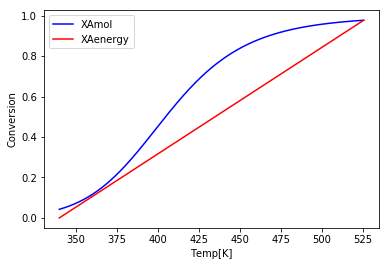

In [104]:
plt.figure(2)
plt.plot(tspanb, Xb1, color='blue', label='XAmol')
plt.plot(tspanb, Xb2, color='red', label='XAenergy')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
plt.show()

**Question c)**

By how much should the inlet temperature be altered to improve the controllability of the design in (a)? <em>(I will be OK with an approximate answer here – do not try to “design” a fancy solver. Use the figures you constructed in a))</em>

In [105]:
Toc = 359 #K keep increasing the inlet temperature until graph below
#only has one intersecting point

def CSTRc(varc):
    Xc = varc[0]
    Tc = Toc - delHrx*Xc/(CpA)
    return[Xc - (Ko/Q)*exp(-Ea/(R*Tc))*(1-Xc)*V]   

Xcstrc = fsolve(CSTRc,0.9) 
Xc     = Xcstrc[-1]
Tc     = Toc - delHrx*Xc/(CpA)

print('Max conversion for CSTR=', (Xc*100).round(3),'%')

Max conversion for CSTR= 96.125 %


In [106]:
tspanc = linspace(Toc,Tc,1000)
k1c = (Ko/Q)*exp(-Ea/(R*tspanc))
X1c = k1c*V/(1+k1c*V)
X2c = (CpA*(tspanc-Toc))/-delHrx

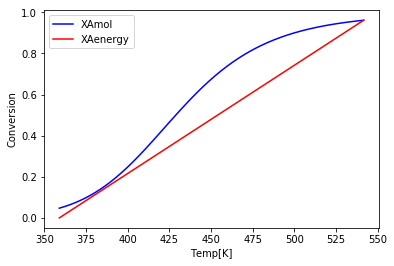

In [107]:
plt.figure(3)
plt.plot(tspanc, X1c, color='blue', label='XAmol')
plt.plot(tspanc, X2c, color='red', label='XAenergy')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
plt.show()

In [108]:
print('Increase in inlet temp =', (Toc-To),'K')

Increase in inlet temp = 19 K


**Question d)**

The student who determined the activation energy of the reaction did not work accurately enough. The real value is closer to $E_{a} =60000~𝐽.𝑚ol^{-1}$. How will this affect the design in (a)? <em>(Spare a thought for the responsibility you have if you are the one shaping the rate equation of a specific reaction from laboratory data…)</em>

In [109]:
Eanew = 60000 #J/mol

def CSTRd(vard):
    Xd = vard[0]
    Td = To - delHrx*Xd/(CpA)
    return[Xd - (Ko/Q)*exp(-Eanew/(R*Td))*(1-Xd)*V]   

Xcstrd = fsolve(CSTRd,0.9) 
Xd = Xcstrd[-1]
Td = To - delHrx*Xd/(CpA)
print('Max conversion for CSTR=', (Xd*100).round(2),'%')
print('Outlet temperature for CSTR=', (Td).round(2),'K')

Max conversion for CSTR= 0.31 %
Outlet temperature for CSTR= 340.59 K


Raising the activation energy essentially stalls the reaction. Very, very little gets converted.

In [110]:
tspand = linspace(To,Td,1000)
k1d = (Ko/Q)*exp(-Eanew/(R*tspand))
X1d = k1d*V/(1+k1d*V)
X2d = (CpA*(tspand-To))/-delHrx

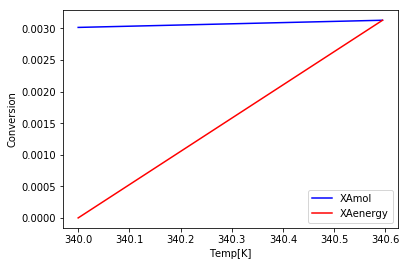

In [111]:
plt.figure(4)
plt.plot(tspand, X1d, color='blue', label='XAmol')
plt.plot(tspand, X2d, color='red', label='XAenergy')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
plt.show()

Essentially no conversion

**Question e)**

If additional heat was added to the reactor) in (a) by means of a constant temperature utility, what must the utility temperature be to obtain $95\%$ conversion? Are multiple steady states a problem in this case? (Use $UA=31.6~W/K$)

The energy balance now no longer equals zero:
$$
\begin{align}
\Sigma_{i} F_{i_{0}}C_{p_{i}}(T - T_{0}) + (-\Delta F_{A})\Delta H^{\circ}_{RX_{A}} &= UA(T_{U} - T) \nonumber \\
F_{A_{0}}C_{p_{A}}(T - T_{0}) + (F_{A_{0}}X_{A})\Delta H^{\circ}_{RX_{A}} &= UAT_{U} - UAT \nonumber \\
T(F_{A_{0}}C_{p_{A}} + UA) - F_{A_{0}}C_{p_{A}}T_{0} + F_{A_{0}}X_{A}\Delta H^{\circ}_{RX_{A}} &= UAT_{U} \nonumber \\
T(F_{A_{0}}C_{p_{A}} + UA) &= - F_{A_{0}}X_{A}\Delta H^{\circ}_{RX_{A}} +  UAT_{U} + F_{A_{0}}C_{p_{A}}T_{0}  \nonumber \\
T &= \dfrac{- F_{A_{0}}\Delta H^{\circ}_{RX_{A}}}{F_{A_{0}}C_{p_{A}} + UA}X_{A} + \dfrac{UAT_{U} + F_{A_{0}}C_{p_{A}}T_{0}}{F_{A_{0}}C_{p_{A}} + UA}
\end{align}
$$

In [112]:
UA  = 31.6 #J/(s.K)
Eae = 55000 #J/mol

Tu  = 539.53 #keep changing until X=0.95

def CSTRe(vare):
    Xe = vare[0]
    a  = CAo*Q*CpA + UA
    Te = (UA*Tu+CAo*Q*CpA*To)/a - CAo*Q*delHrx*Xe/a
    return[Xe - (Ko/Q)*exp(-Eae/(R*Te))*(1-Xe)*V]   

Xcstre = fsolve(CSTRe,0.9) 
Xe     = Xcstre[-1]
a      = CAo*Q*CpA + UA
Te     = (UA*Tu+CAo*Q*CpA*To)/a - CAo*Q*delHrx*Xe/a

print('Max conversion for CSTR=', (Xe*100).round(2),'%')
print('Outlet temperature for CSTR=', (Te).round(2),'K')
print('Utility temperature for CSTR=', (Tu),'K')

Max conversion for CSTR= 95.0 %
Outlet temperature for CSTR= 530.01 K
Utility temperature for CSTR= 539.53 K


In [113]:
tspane = linspace(To,600,1000)

ke     = (Ko/Q)*exp(-Eae/(R*tspane))
Xmb    = ke*V/(1+ke*V)
a      = CAo*Q*CpA + UA
Xeb    = CpA*To/delHrx + (UA*Tu - a*tspane)/(CAo*Q*delHrx)
Xad    = CpA*(tspane-To)/(-delHrx)

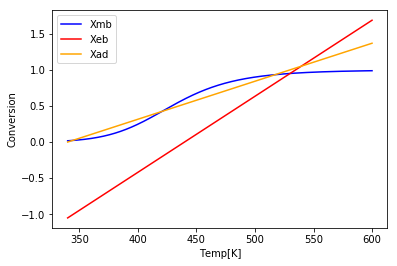

In [116]:
plt.figure(5)
plt.plot(tspane, Xmb, color='blue', label='Xmb')
plt.plot(tspane, Xeb, color='red', label='Xeb')
plt.plot(tspane, Xad, color='Orange', label='Xad')
plt.legend(loc='best')
plt.ylabel('Conversion') 
plt.xlabel('Temp[K]') 
plt.show()

- The energy balances are a straight line as expected from an adiabatic, non-isothermal reactor. 
- The blue line is the curve from the mole balance.
- The orange line shows the energy balance without any utility temperature added. Clearly it causes multiplicity issues.
- The red line shows the energy balance WITH a utility temperature added. We can conclude that adding a utility temperature is one way to solve for the multiplicity issue with adiabatic and non-isothermal reactors.